# importing the CSV files

In [1]:
import pandas as pd

real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

# print the dataframe 
print(real_news.head())
print(fake_news.head())

                                               title   
0  As U.S. budget fight looms, Republicans flip t...  \
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject   
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title   
0   Donald Trump Sends Out Embarrassing Ne

# Plot the distribution of article lengths in each dataset

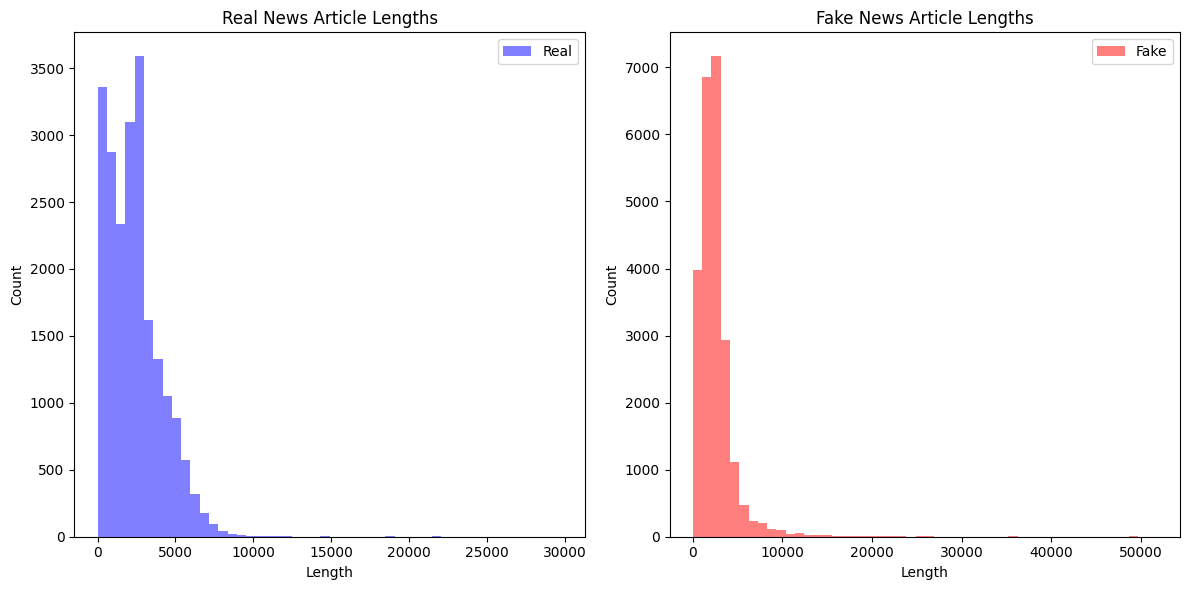

In [4]:
import matplotlib.pyplot as plt

real_lengths = real_news['text'].apply(len)
fake_lengths = fake_news['text'].apply(len)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(real_lengths, bins=50, alpha=0.5, color='blue', label='Real')
plt.title('Real News Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(fake_lengths, bins=50, alpha=0.5, color='red', label='Fake')
plt.title('Fake News Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

# Most common words in each dataset

In [5]:
from collections import Counter
import nltk
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

def get_most_common_words(texts, num_words=10):
    all_words = []
    for text in texts:
        all_words.extend(nltk.word_tokenize(text.lower()))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

real_words = get_most_common_words(real_news['text'])
fake_words = get_most_common_words(fake_news['text'])

print('Real News:', real_words)
print('Fake News:', fake_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ammar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ammar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Real News: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
Fake News: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


# Text Preprocessing

## Lowercasing the Text
### Lowercasing the text refers to converting all the letters in a piece of text to lowercase. This is a common text preprocessing step that can be useful for improving the accuracy of text classification models. For example, “Hello” and “hello” would be considered two different words by a model that does not account for case, whereas if the text is converted to lowercase, they would be treated as the same word.

## Removing Punctuation and Digits
### Removing punctuation and digits refers to removing non-alphabetic characters from a text. This can be useful for reducing the complexity of the text and making it easier for a model to analyze. For example, the words “Hello,” and “Hello!” would be considered different words by a text analysis model if it doesn’t account for the punctuation.

## Removing Stop Words
### Stop words are words that are very common in a language and do not carry much meaning, such as “the”, “and”, “in”, etc. Removing stop words from a piece of text can help reduce the dimensionality of the data and focus on the most important words in the text. This can also help improve the accuracy of a text classification model by reducing noise in the data.

## Stemming or Lemmatizing the Text
### Stemming and lemmatizing are common techniques for reducing words to their base form. Stemming involves removing the suffixes of words to produce a stem or root word. For example, the word “jumping” would be stemmed to “jump.” This technique can be useful for reducing the dimensionality of the data, but it can sometimes result in stems that are not actual words.

### Conversely, Lemmatizing involves reducing words to their base form using a dictionary or morphological analysis. For example, the word “jumping” would be lemmatized to “jump”, which is an actual word. This technique can be more accurate than stemming but also more computationally expensive.

### Both stemming and lemmatizing can reduce the dimensionality of text data and make it easier for a model to analyze. However, it is important to note that they can sometimes result in loss of information, so it is important to experiment with both techniques and determine which works best for a particular text classification problem.

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]
   
        # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ammar\AppData\Roaming\nltk_data...


In [8]:
real_news['text'] = real_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

# Model Training

### We can train our model now that we have preprocessed our text data. We will use a simple bag-of-words approach, representing each article as a vector of word frequencies. We will use the CountVectorizer class from the sklearn library to convert the preprocessed text into feature vectors.

### CountVectorizer is a commonly used text preprocessing technique in natural language processing. It transforms a collection of text documents into a matrix of word counts. Each row in the matrix represents a document, and each column represents a word in the document collection.

### The CountVectorizer converts a collection of text documents into a matrix of token counts. It works by first tokenizing the text into words and then counting the frequency of each word in each document. The resulting matrix can be used as input to machine learning algorithms for tasks such as text classification.

### The CountVectorizer has several parameters that can be adjusted to customize the text preprocessing. For example, the “stop_words” parameter can be used to specify a list of words that should be removed from the text before counting. The “max_df” parameter can specify the maximum document frequency for a word, beyond which the word is considered a stop word and removed from the text.

### One advantage of CountVectorizer is that it is simple to use and works well for many types of text classification problems. It is also very efficient regarding memory usage, as it only stores the frequency counts of each word in each document. Another advantage is that it is easy to interpret, as the resulting matrix can be directly inspected to understand the importance of different words in the classification process.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real_news['text'])
X_fake = vectorizer.transform(fake_news['text'])

X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the labels for the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print the evaluation metrics
    print("____________________________________________________")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
# Train and evaluate a Multinomial Naive Bayes model
print("Training and evaluating Multinomial Naive Bayes model...")
nb = MultinomialNB()
train_and_evaluate_model(nb, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Support Vector Machine model
print("Training and evaluating Support Vector Machine model...")
svm = SVC()
train_and_evaluate_model(svm,  X_train, y_train, X_test, y_test)

# Train and evaluate a RandomForestClassifier model
print("Training and evaluating RandomForestClassifier model...")
RF = RandomForestClassifier()
train_and_evaluate_model(RF,  X_train, y_train, X_test, y_test)

Training and evaluating Multinomial Naive Bayes model...
Accuracy: 0.9422
Precision: 0.9422
Recall: 0.9422
F1-score: 0.9422

Training and evaluating Support Vector Machine model...
Accuracy: 0.9919
Precision: 0.9919
Recall: 0.9919
F1-score: 0.9919
Training and evaluating RandomForestClassifier model...
Accuracy: 0.9916
Precision: 0.9916
Recall: 0.9916
F1-score: 0.9916


# Improving the Model
### While our logistic regression model achieved high accuracy on the test set, there are several ways we could potentially improve its performance:

* ### Feature engineering: Instead of using a bag-of-words approach, we could use more advanced text representations, such as word embeddings or topic models, which may capture more nuanced relationships between words.
* ### Hyperparameter tuning: We could tune the hyperparameters of the logistic regression model using methods such as grid search or randomized search to find the optimal set of parameters for our dataset.

# Hyperparameters tuning 

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

# Define reduced search spaces for each classifier
rf_hyperparameters = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

svm_hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

mnb_hyperparameters = {
    'alpha': [0.1, 0.5, 1.0],
}

# Perform randomized search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_hyperparameters, n_iter=10, cv=3, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

# Perform randomized search for Support Vector Machine
svm_random_search = RandomizedSearchCV(SVC(), svm_hyperparameters, n_iter=6, cv=3, n_jobs=-1)
svm_random_search.fit(X_train, y_train)

# Perform randomized search for Multinomial Naive Bayes
mnb_random_search = RandomizedSearchCV(MultinomialNB(), mnb_hyperparameters, n_iter=3, cv=3, n_jobs=-1)
mnb_random_search.fit(X_train, y_train)

# Print the best hyperparameters and test accuracy for each classifier
print('Random Forest - Best hyperparameters:', rf_random_search.best_params_)
print('Random Forest - Test accuracy:', rf_random_search.score(X_test, y_test))

print('\nSupport Vector Machine - Best hyperparameters:', svm_random_search.best_params_)
print('Support Vector Machine - Test accuracy:', svm_random_search.score(X_test, y_test))

print('\nMultinomial Naive Bayes - Best hyperparameters:', mnb_random_search.best_params_)
print('Multinomial Naive Bayes - Test accuracy:', mnb_random_search.score(X_test, y_test))


Random Forest - Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Random Forest - Test accuracy: 0.9924276169265034

Support Vector Machine - Best hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 0.1}
Support Vector Machine - Test accuracy: 0.99543429844098

Multinomial Naive Bayes - Best hyperparameters: {'alpha': 0.5}
Multinomial Naive Bayes - Test accuracy: 0.9428730512249444
